In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Elon_musk.csv',encoding = 'latin1')
data.head()

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.no.   1999 non-null   int64 
 1   Text    1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [5]:
data.shape

(1999, 2)

In [6]:
data1 = list(np.array(data['Text']))
data1

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
nlp = spacy.load('en_core_web_sm')

In [8]:
#Using spacy for Tokenizing our dataset
doc_sen = []
for sen in data1:
    doc = nlp(sen)
    doc_sen.append(doc)

In [9]:
#Tokenized Sentences
doc_sen

[@kunalb11 Im an alien,
 @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,
 @joerogan @Spotify Great interview!,
 @gtera27 Doge is underestimated,
 @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,
 Happy New Year of the Ox! https://t.co/9WFKMYu2oj,
 Frodo was the underdoge,
 All thought he would fail,
 Himself most of all. https://t.co/zGxJFDzzrM,
 @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),
 @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,
 The most entertaining outcome is the most likely,
 @GiveDirectly Just sent some,
 Just agree to do Clubhouse with @kanyewest,
 https://t.co/3rWE9uHSTS,
 @geoffkeighley @UnrealEngine Its getting real,
 Bought some Dogecoin for lil X, so he can be a toddler hodler,
 @JoshManMode He definitely has issues, but the sentencing seems a bit high,
 @freewalletorg Thanks for fixing,
 @freewalletorg Please unlock my accoun

In [10]:
#Tokens present in Sentences
for doc in doc_sen:
    for token in doc:
        print(token.text,end = '||||')
    print('\n')

@kunalb11||||Im||||an||||alien||||

@ID_AA_Carmack||||Ray||||tracing||||on||||Cyberpunk||||with||||HDR||||is||||next||||-||||level||||.||||Have||||you||||tried||||it||||?||||

@joerogan||||@Spotify||||Great||||interview||||!||||

@gtera27||||Doge||||is||||underestimated||||

@teslacn||||Congratulations||||Tesla||||China||||for||||amazing||||execution||||last||||year||||.||||Now||||on||||to||||the||||next||||for||||even||||more||||!||||!||||

Happy||||New||||Year||||of||||the||||Ox||||!||||https://t.co/9WFKMYu2oj||||

Frodo||||was||||the||||underdoge||||,||||
||||All||||thought||||he||||would||||fail||||,||||
||||Himself||||most||||of||||all||||.||||https://t.co/zGxJFDzzrM||||

@OwenSparks||||_||||@flcnhvy||||@anonyx10||||Haha||||thanks||||:)||||

@flcnhvy||||@anonyx10||||Indeed||||!||||Tweets||||definitely||||do||||not||||represent||||real||||-||||world||||time||||allocation||||.||||

The||||most||||entertaining||||outcome||||is||||the||||most||||likely||||

@GiveDirectly||||Just||||s

In [11]:
#Visualize NER
for doc in doc_sen:
    displacy.render(doc, style='ent', jupyter=True)
    print('\n')

/usr/local/lib/python3.7/dist-packages/spacy/displacy/__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [12]:
data2 = data.copy()
data2.head()

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [13]:
#Impliment word tokenize using NLTK
data2['Text'].dropna(inplace=True)
tokens = data2['Text'].apply(word_tokenize)
data2

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [14]:
#Removing unwanted symbole incase if exist
ip_rev_string = []
for string in data1:
    string = re.sub("[^A-Za-z]+"," ",string = string).lower()
    ip_rev_string.append(string)

ip_rev_string

[' kunalb i m an alien',
 ' id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it ',
 ' joerogan spotify great interview ',
 ' gtera doge is underestimated',
 ' teslacn congratulations tesla china for amazing execution last year now on to the next for even more ',
 'happy new year of the ox https t co wfkmyu oj',
 'frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm',
 ' owensparks flcnhvy anonyx haha thanks ',
 ' flcnhvy anonyx indeed tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely',
 ' givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'https t co rwe uhsts',
 ' geoffkeighley unrealengine it s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 ' joshmanmode he definitely has issues but the sentencing seems a bit high',
 ' freewalletorg thanks for fixing',
 ' freewalletorg please unlock my account'

### Word Cloud

In [15]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [16]:
# positive words # Choose the path for +ve words stored in system
with open("/content/drive/MyDrive/Colab Notebooks/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[35:]
poswords

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [17]:
# negative words  Choose path for -ve words stored in system
with open("/content/drive/MyDrive/Colab Notebooks/negative-words.txt","r",encoding="ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[35:]
negwords

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [18]:
dataset = ' '.join(ip_rev_string)
text = re.sub(r'http\S+', '', dataset)
ip_reviews_words = text.split(" ")
ip_reviews_words

['',
 'kunalb',
 'i',
 'm',
 'an',
 'alien',
 '',
 'id',
 'aa',
 'carmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'is',
 'next',
 'level',
 'have',
 'you',
 'tried',
 'it',
 '',
 '',
 'joerogan',
 'spotify',
 'great',
 'interview',
 '',
 '',
 'gtera',
 'doge',
 'is',
 'underestimated',
 '',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 '',
 't',
 'co',
 'wfkmyu',
 'oj',
 'frodo',
 'was',
 'the',
 'underdoge',
 'all',
 'thought',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 '',
 't',
 'co',
 'zgxjfdzzrm',
 '',
 'owensparks',
 'flcnhvy',
 'anonyx',
 'haha',
 'thanks',
 '',
 '',
 'flcnhvy',
 'anonyx',
 'indeed',
 'tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 '',
 'the',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 '

In [19]:
cloud = WordCloud(background_color = "black", max_words = 200, stopwords = set(STOPWORDS))

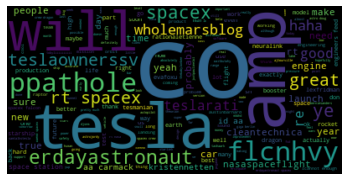

In [20]:
cloud.generate(text)
plt.figure()
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")

plt.show()

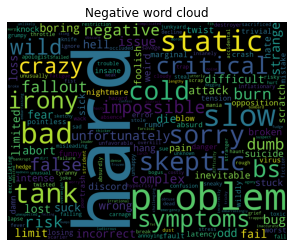

In [21]:
# Negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=1800,height=1400).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")
plt.title('Negative word cloud')
plt.show()

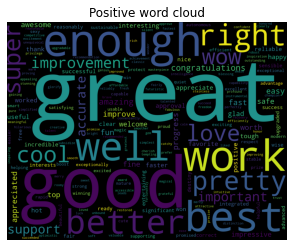

In [22]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=1800,height=1400).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.title('Positive word cloud')
plt.show()

## Sentiment Analysis using NLTK

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
def get_vader_sentiment(review): 

    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [25]:
sentiment = []
for review in ip_rev_string:
    sent = get_vader_sentiment(review)
    sentiment.append(sent)
    
sentiment

['neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 '

In [26]:
final_data = data.copy()
final_data['sentiment_nltk'] = sentiment
final_data.head()

,S.no.,Text,sentiment_nltk
0,1,@kunalb11 Im an alien,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral
2,3,@joerogan @Spotify Great interview!,positive
3,4,@gtera27 Doge is underestimated,negative
4,5,@teslacn Congratulations Tesla China for amazi...,positive


## Sentiment Analysis using TextBlob

In [27]:
from textblob import TextBlob 

In [28]:
def get_sentiment(review): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [29]:
sentiment = []
for review in ip_rev_string:
    sent = get_sentiment(review)
    sentiment.append(sent)
    
sentiment

['negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'posi

In [30]:
final_data['sentiment_textblob'] = sentiment
final_data

,S.no.,Text,sentiment_nltk,sentiment_textblob
0,1,@kunalb11 Im an alien,neutral,negative
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral,neutral
2,3,@joerogan @Spotify Great interview!,positive,positive
3,4,@gtera27 Doge is underestimated,negative,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,positive,positive
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",negative,positive
1995,1996,@PPathole Make sure to read ur terms &amp; con...,positive,positive
1996,1997,@TeslaGong @PPathole Samwise Gamgee,neutral,neutral
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,negative,negative


In [31]:
val_nltk = final_data['sentiment_nltk'].value_counts()
val_nltk

positive    903
neutral     858
negative    238
Name: sentiment_nltk, dtype: int64

In [32]:
val_text = final_data['sentiment_textblob'].value_counts()
val_text

positive    895
neutral     872
negative    232
Name: sentiment_textblob, dtype: int64

In [33]:
dt = {'sentiment':val_text.index,'sentiment_nltk':val_nltk.values,'sentiment_textblob':val_text.values}
sentiment_df = pd.DataFrame(dt )
sentiment_df

,sentiment,sentiment_nltk,sentiment_textblob
0,positive,903,895
1,neutral,858,872
2,negative,238,232


<Figure size 1440x720 with 0 Axes>

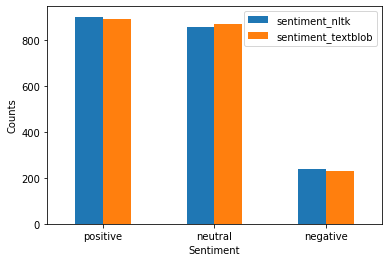

In [34]:
plt.figure(figsize = (20,10))
sentiment_df.plot.bar(x = 'sentiment', y = ['sentiment_nltk', 'sentiment_textblob'], rot = 0)
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()